In [4]:
# ------------------------------------------------------------------------------
# Author    : Benedictus Briatore Ananta
# Purpose   : Credit Risk Prediction - ID/X Partner Final Task
# Date      : 25 Mei 2025 (Update)
# ------------------------------------------------------------------------------

In [5]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load Dataset
df = pd.read_csv("loan_data_2007_2014.csv", low_memory=False)

In [7]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,8575,839998,1050290,6000,6000,6000.0,36 months,15.23,208.67,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8576,8576,864103,1077261,14000,14000,14000.0,60 months,18.79,361.56,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8577,8577,864110,1077320,25000,25000,25000.0,36 months,13.49,848.27,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8578,8578,852186,1064216,8000,8000,8000.0,36 months,5.42,241.28,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Data Understanding
print("Jumlah baris dan kolom:", df.shape)
df.info()
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Jumlah baris dan kolom: (8580, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8580 non-null   int64  
 1   id                           8580 non-null   int64  
 2   member_id                    8580 non-null   int64  
 3   loan_amnt                    8580 non-null   int64  
 4   funded_amnt                  8580 non-null   int64  
 5   funded_amnt_inv              8580 non-null   float64
 6   term                         8580 non-null   object 
 7   int_rate                     8580 non-null   float64
 8   installment                  8580 non-null   float64
 9   grade                        8580 non-null   object 
 10  sub_grade                    8580 non-null   object 
 11  emp_title                    8009 non-null   object 
 12  emp_length                   8268 non-nul

In [9]:
# Target Variable Definition (GOOD/BAD credit)
df = df[df['loan_status'].notnull()]
good_status = ['Current', 'Fully Paid']
df['label'] = df['loan_status'].apply(lambda x: 1 if x in good_status else 0)

In [10]:
# Feature Selection
selected_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'open_acc']
df = df[selected_cols + ['label']]
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)


Univariate Analysis:

Distribution of Label (GOOD/BAD Credit):
label
1    0.841087
0    0.158913
Name: proportion, dtype: float64


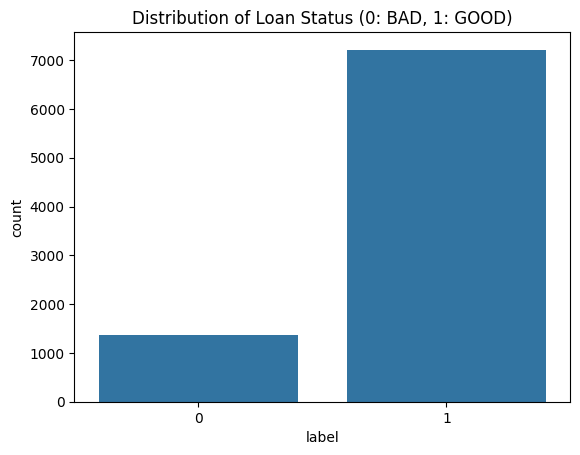

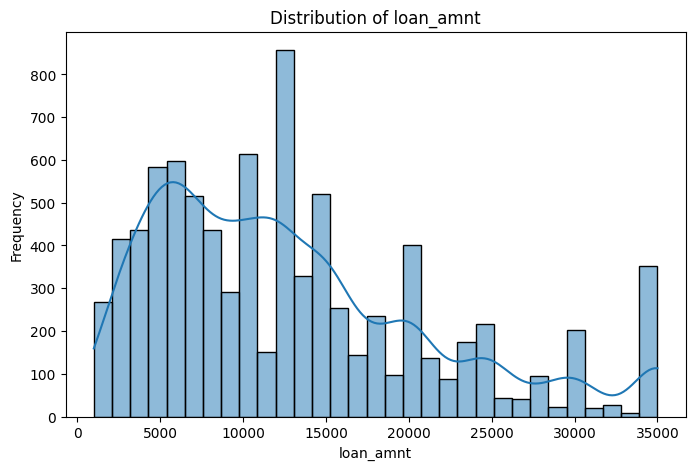

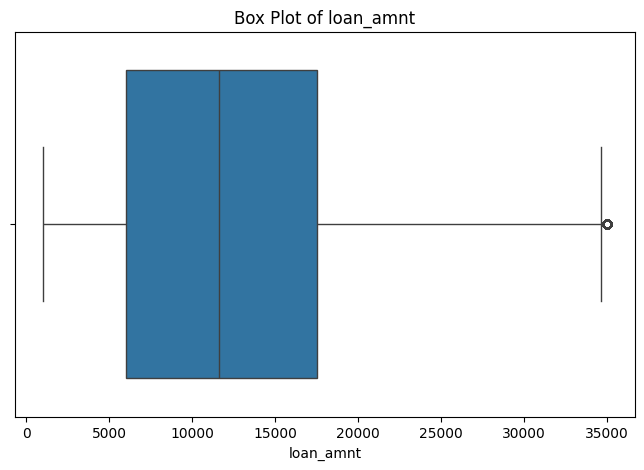

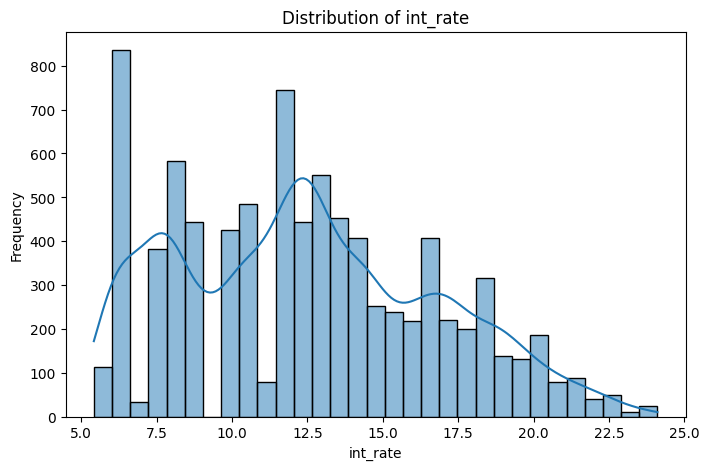

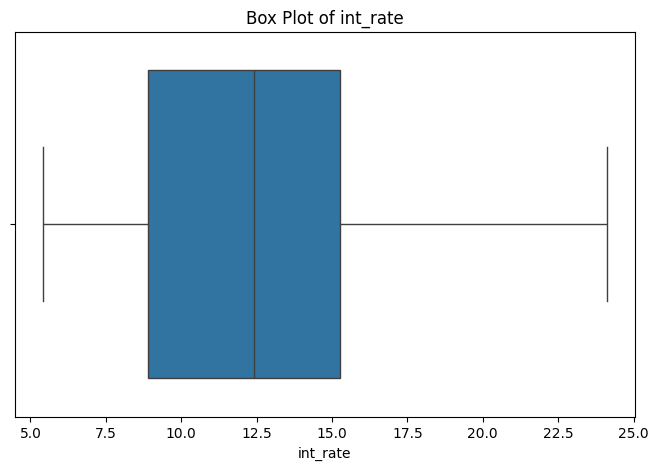

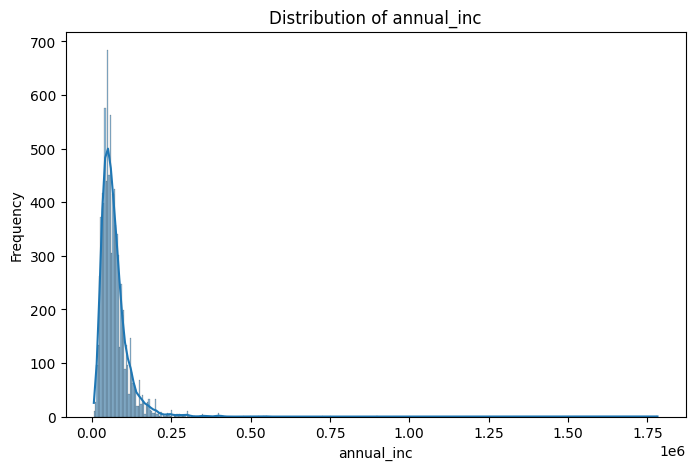

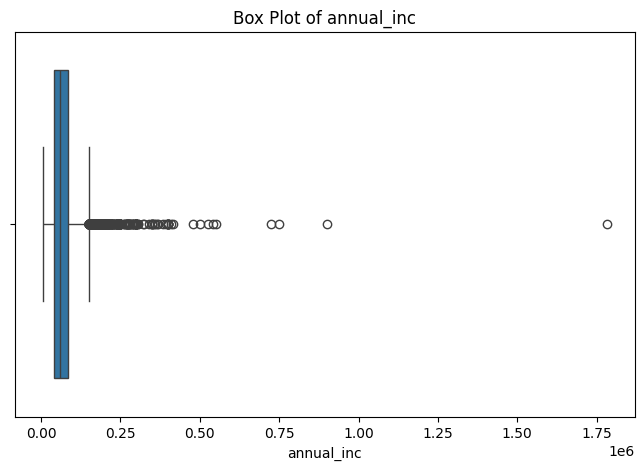

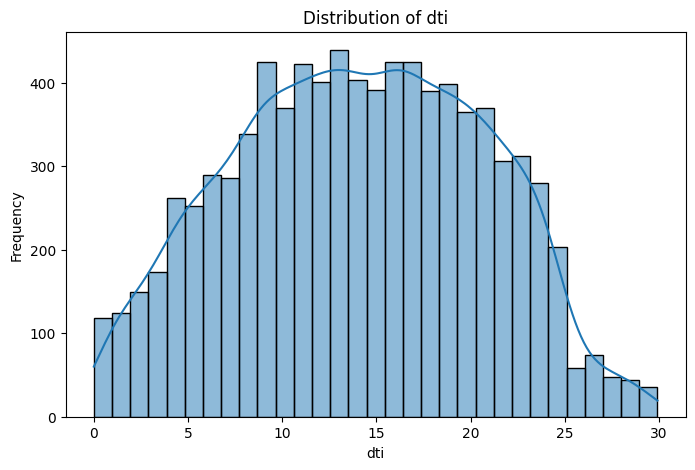

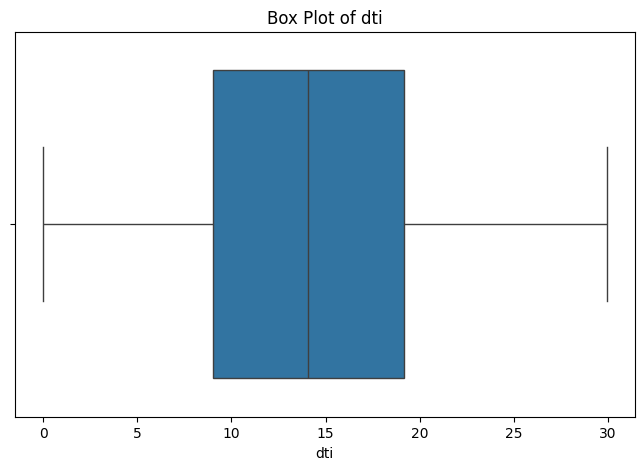

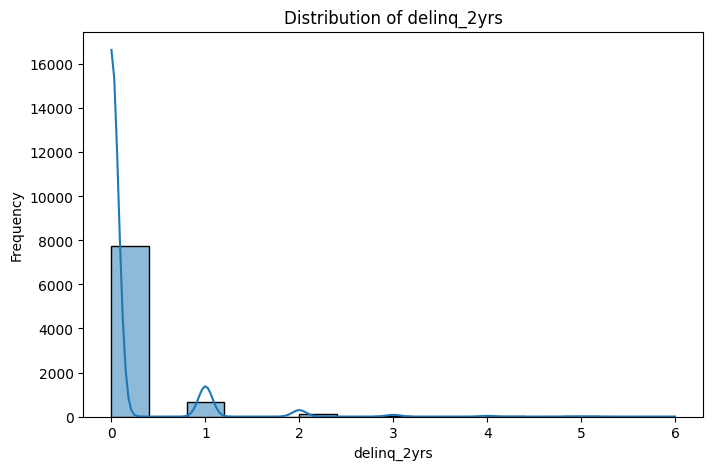

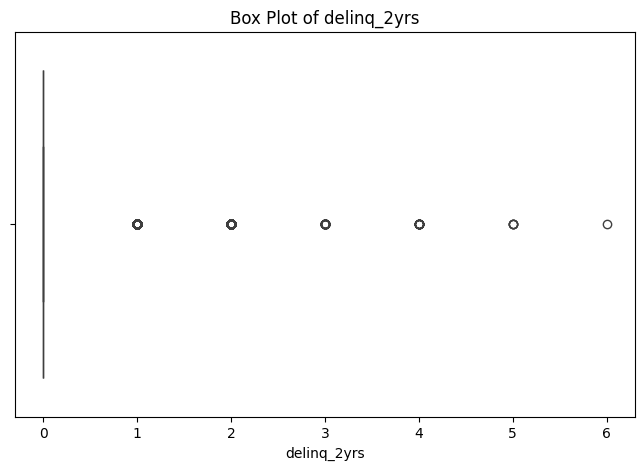

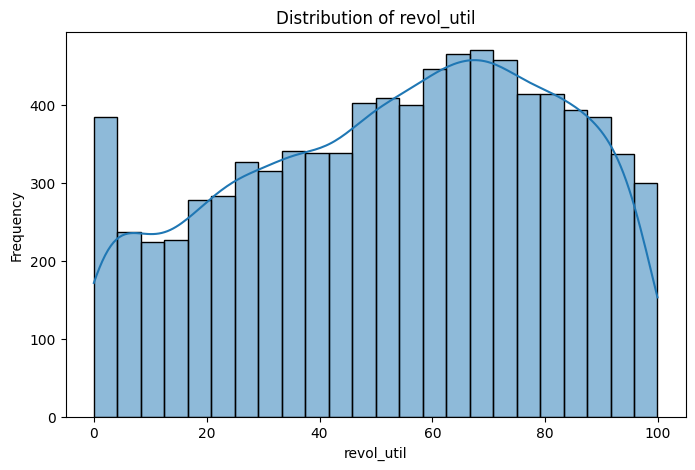

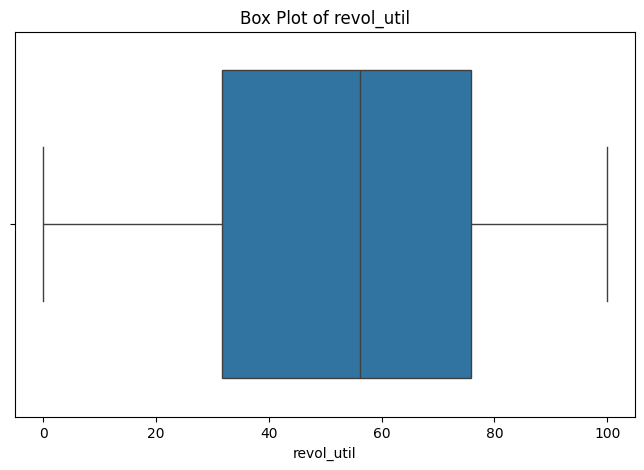

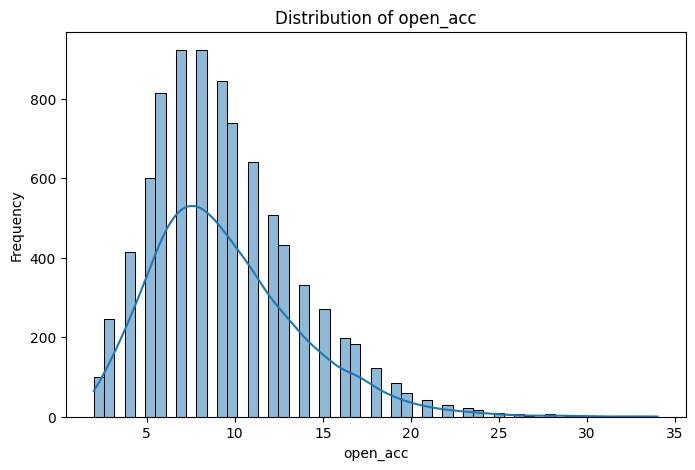

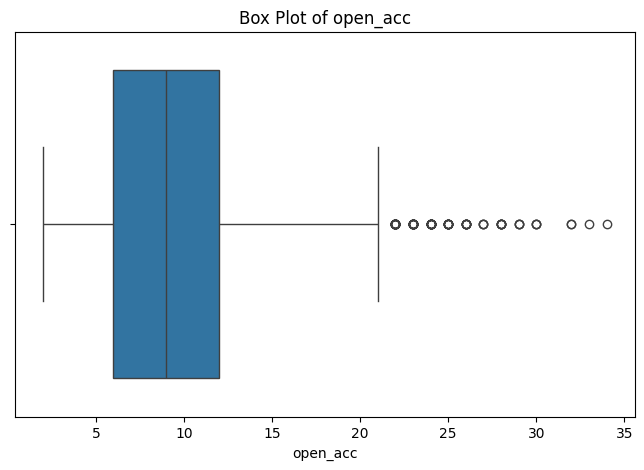

In [11]:
# Univariate Analysis
print("\nUnivariate Analysis:")

# Distribution of Target Variable
print("\nDistribution of Label (GOOD/BAD Credit):")
print(df['label'].value_counts(normalize=True))
sns.countplot(x='label', data=df)
plt.title('Distribution of Loan Status (0: BAD, 1: GOOD)')
plt.show()

# Distributions of Numerical Features
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'open_acc']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


Bivariate Analysis:


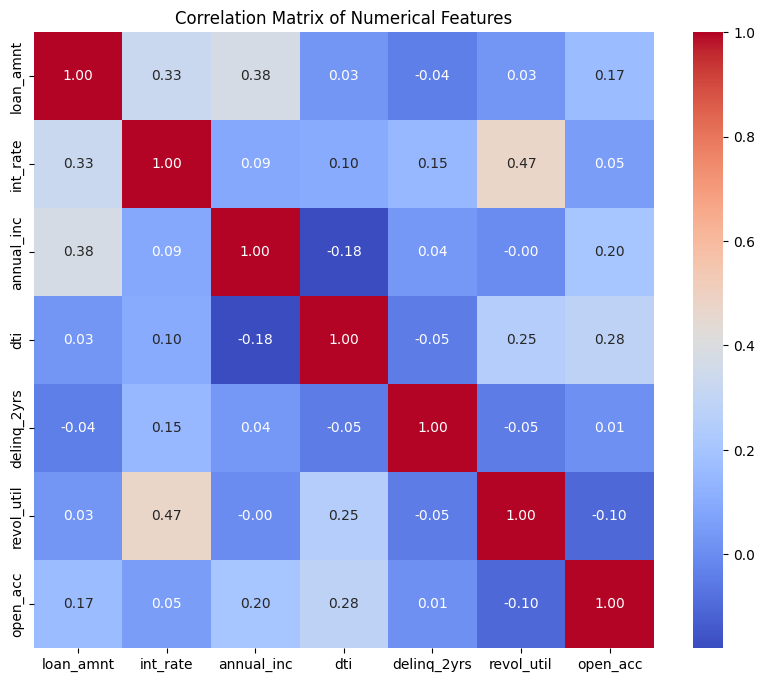

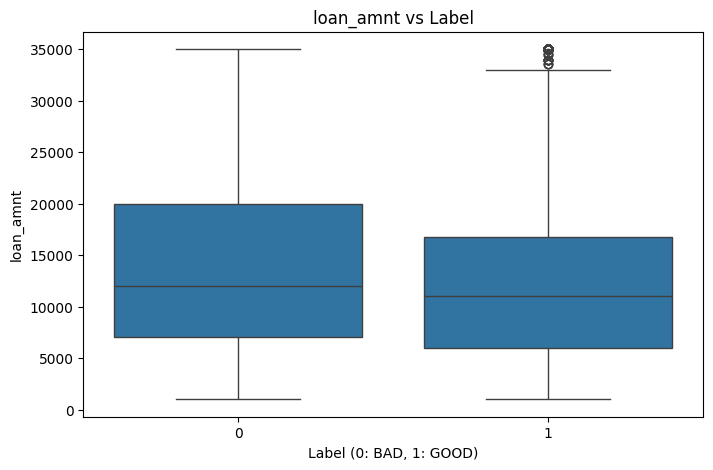

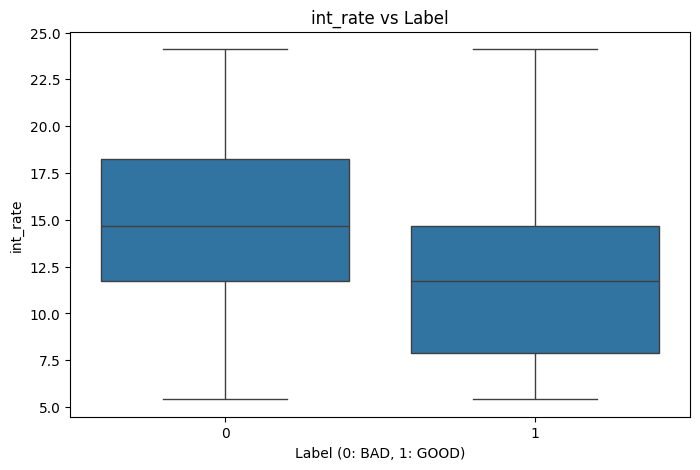

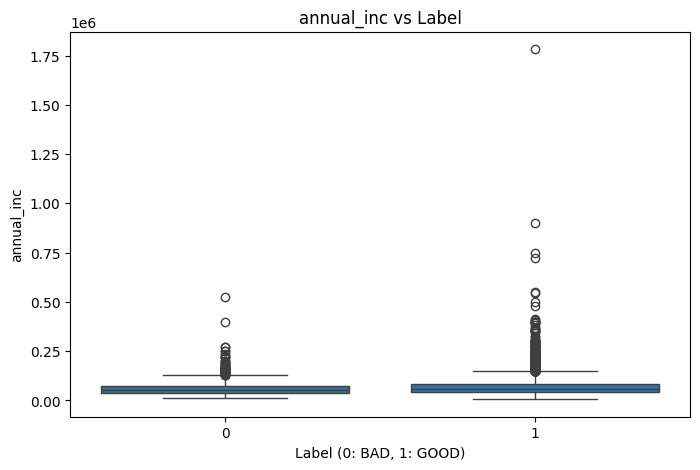

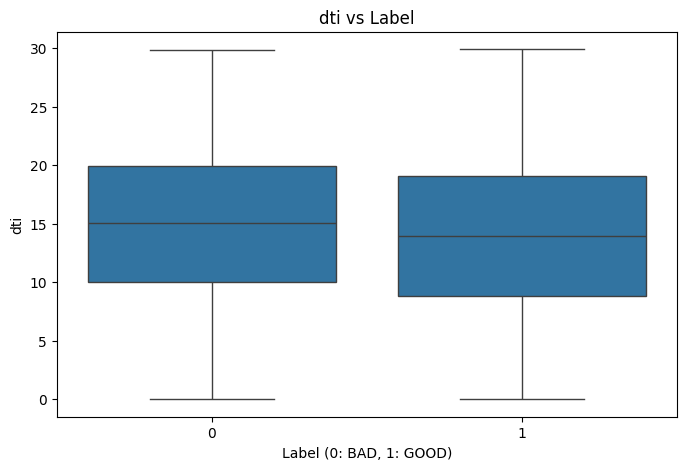

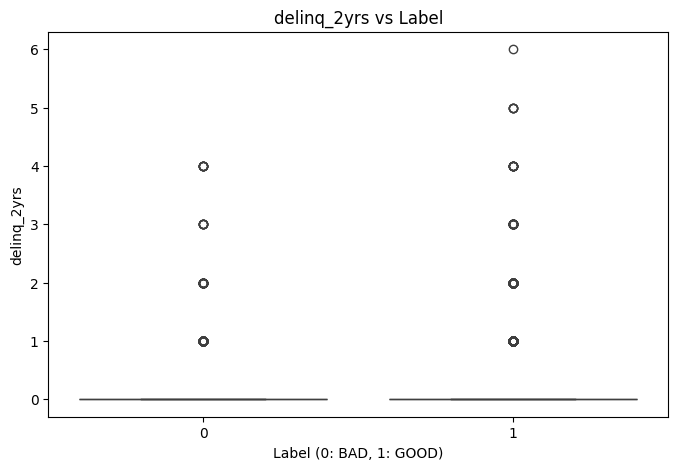

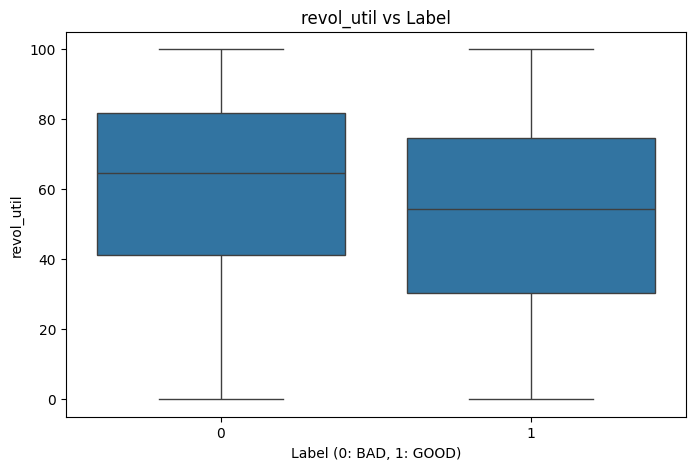

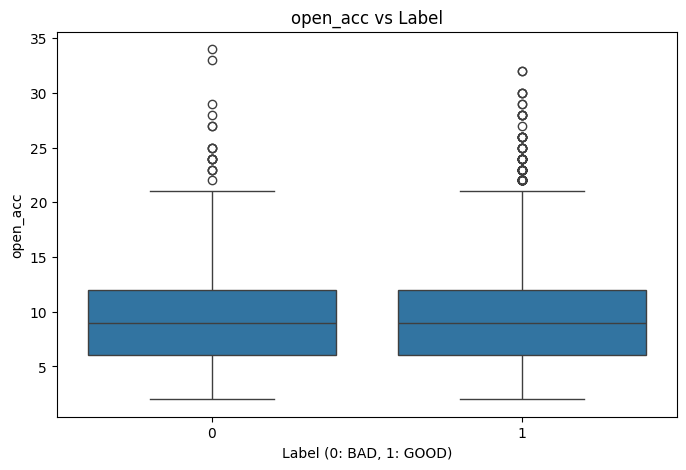

In [12]:
# Bivariate Analysis
print("\nBivariate Analysis:")

# Correlation Matrix of Numerical Features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between Numerical Features and Target Variable
for col in numerical_cols:
    if col != 'label':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='label', y=col, data=df)
        plt.title(f'{col} vs Label')
        plt.xlabel('Label (0: BAD, 1: GOOD)')
        plt.ylabel(col)
        plt.show()

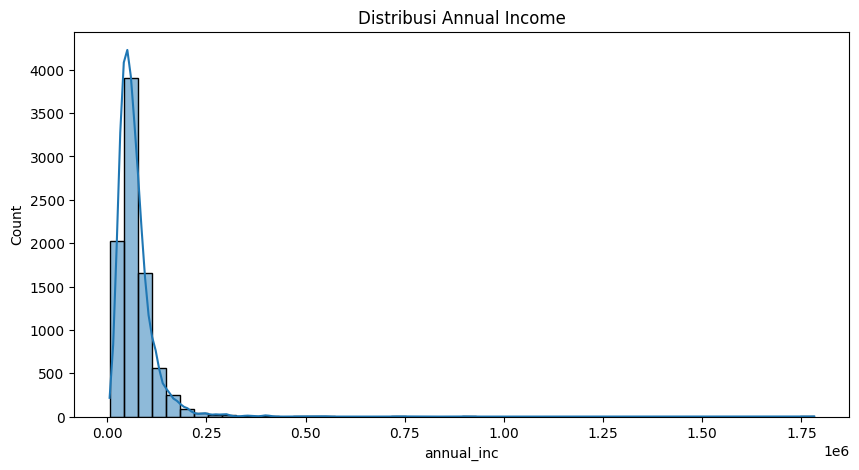

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['annual_inc'], bins=50, kde=True)
plt.title('Distribusi Annual Income')
plt.show()

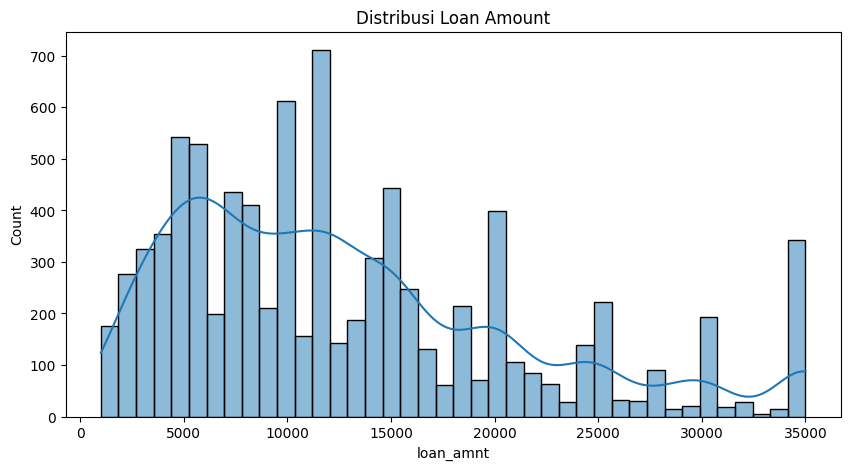

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['loan_amnt'], bins=40, kde=True)
plt.title('Distribusi Loan Amount')
plt.show()

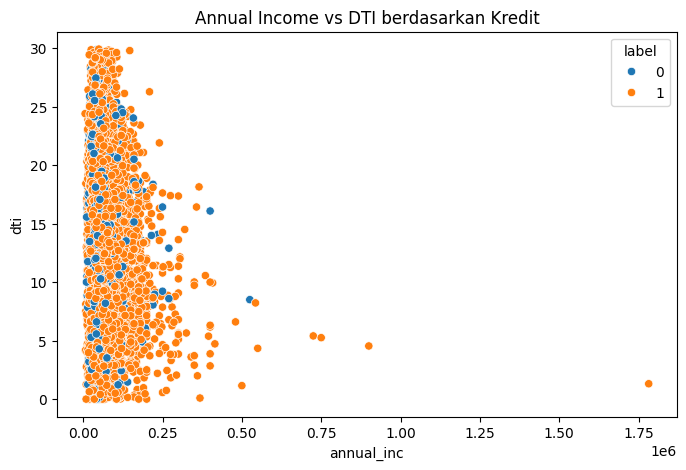

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='annual_inc', y='dti', hue='label', data=df)
plt.title('Annual Income vs DTI berdasarkan Kredit')
plt.show()

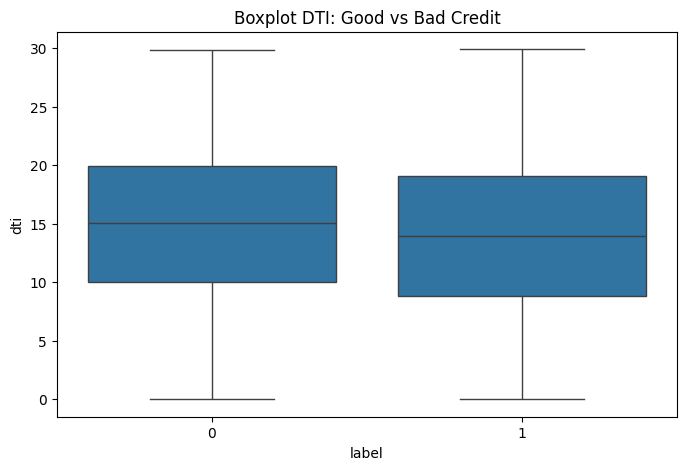

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='dti', data=df)
plt.title('Boxplot DTI: Good vs Bad Credit')
plt.show()

# Preprocessing

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(df[selected_cols])
y = df['label']

In [18]:
# Imbalanced Handling
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [19]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model Building

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [21]:
# Evaluation Function
def evaluate_model(model, X_data, y_data, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_data)
    roc = roc_auc_score(y_data, model.predict_proba(X_data)[:, 1])
    acc = accuracy_score(y_data, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, ROC-AUC: {roc:.4f}")
    print(classification_report(y_data, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_data, y_pred))

In [22]:
# Train & Test Evaluation
for name, model in models.items():
    print(f"\n{name} - EVALUASI TRAINING SET")
    evaluate_model(model, X_train, y_train, name + " (Train)")
    print(f"\n{name} - EVALUASI TEST SET")
    evaluate_model(model, X_test, y_test, name + " (Test)")


Logistic Regression - EVALUASI TRAINING SET
Logistic Regression (Train) - Accuracy: 0.6480, ROC-AUC: 0.6948
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      5771
           1       0.65      0.63      0.64      5771

    accuracy                           0.65     11542
   macro avg       0.65      0.65      0.65     11542
weighted avg       0.65      0.65      0.65     11542

Confusion Matrix:
 [[3860 1911]
 [2152 3619]]

Logistic Regression - EVALUASI TEST SET
Logistic Regression (Test) - Accuracy: 0.6480, ROC-AUC: 0.6992
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1443
           1       0.65      0.64      0.65      1443

    accuracy                           0.65      2886
   macro avg       0.65      0.65      0.65      2886
weighted avg       0.65      0.65      0.65      2886

Confusion Matrix:
 [[940 503]
 [513 930]]

Random Forest - EVALUASI TRAINING SET
Random

In [23]:
# Cross Validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} CV ROC-AUC Mean: {scores.mean():.4f}")

Logistic Regression CV ROC-AUC Mean: 0.6938
Random Forest CV ROC-AUC Mean: 0.9464
Support Vector Machine CV ROC-AUC Mean: 0.7266
XGBoost CV ROC-AUC Mean: 0.9334


# Hyperparameter Tuning

In [24]:
# Hyperparameter Tuning (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best Params (Logistic Regression):", grid_lr.best_params_)


Best Params (Logistic Regression): {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [25]:
# Hyperparameter Tuning (SVM)
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best Params (SVM):", grid_svm.best_params_)


Best Params (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [26]:
# Hyperparameter Tuning (XGBClassifier)
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb,
                        cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best Params (XGBoost):", grid_xgb.best_params_)

Best Params (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [35]:
# Hyperparameter Tuning (Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
gs.fit(X_train, y_train)
print("Best Random Forest Params:", gs.best_params_)

Best Random Forest Params: {'max_depth': None, 'n_estimators': 200}


# Feature Importance

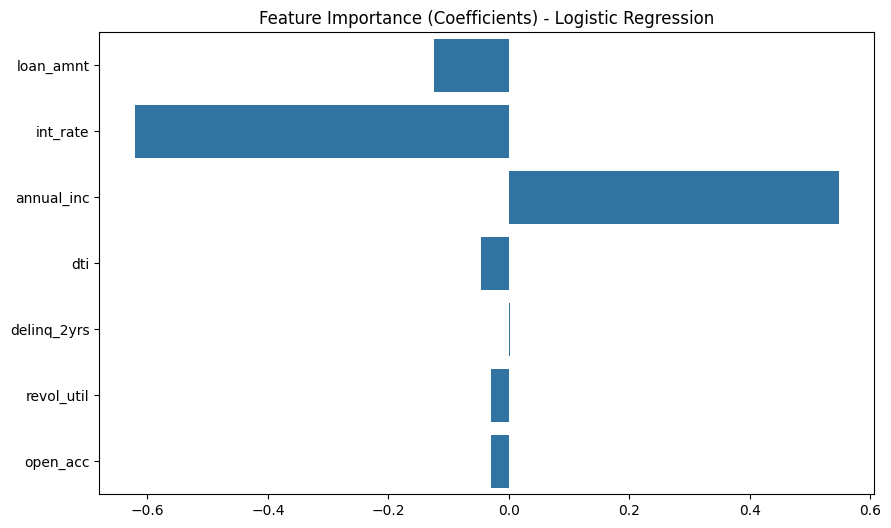

In [28]:
# Feature Importance - Logistic Regression
lr_model = models['Logistic Regression']
lr_model.fit(X_train, y_train)
coefficients = lr_model.coef_[0]
plt.figure(figsize=(10,6))
sns.barplot(x=coefficients, y=selected_cols)
plt.title("Feature Importance (Coefficients) - Logistic Regression")
plt.show()

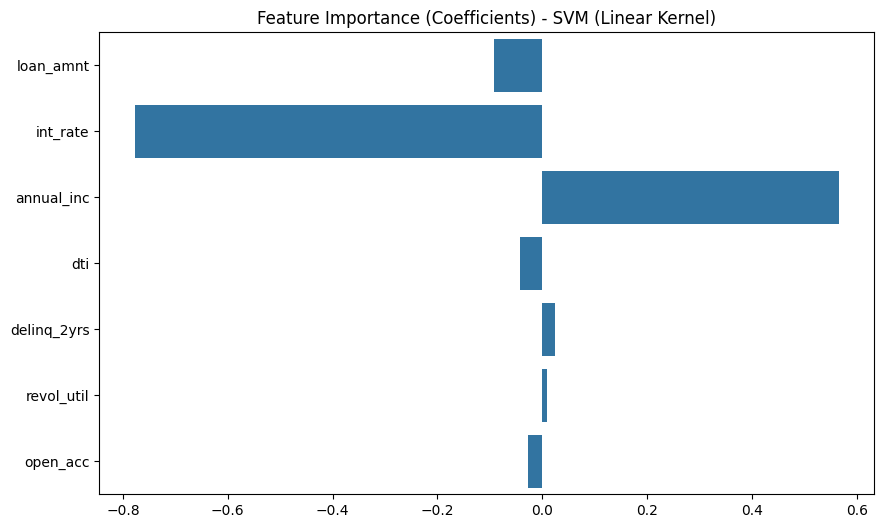

In [29]:
# Feature Importance - SVM (Linear Kernel)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_coefficients = svm_model.coef_[0]
plt.figure(figsize=(10,6))
sns.barplot(x=svm_coefficients, y=selected_cols)
plt.title("Feature Importance (Coefficients) - SVM (Linear Kernel)")
plt.show()

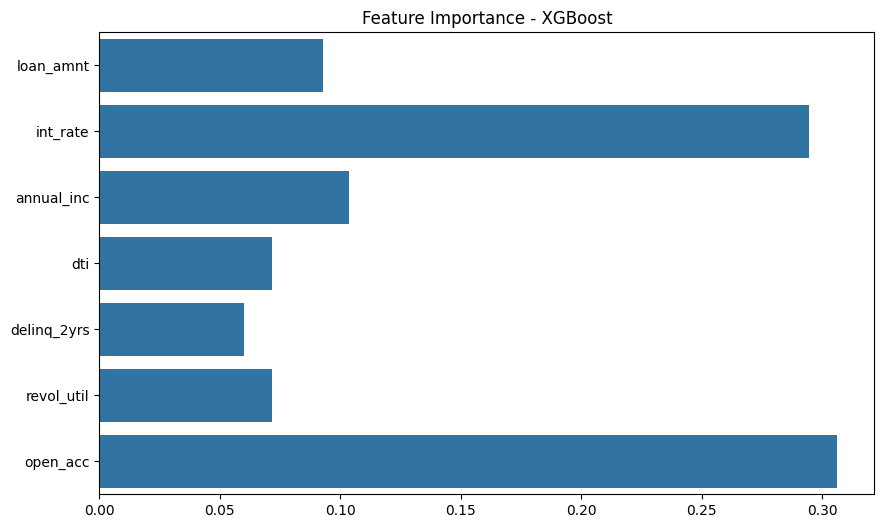

In [30]:
# Feature Importance - XGBoost
xgb_model = models['XGBoost']
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances, y=selected_cols)
plt.title("Feature Importance - XGBoost")
plt.show()

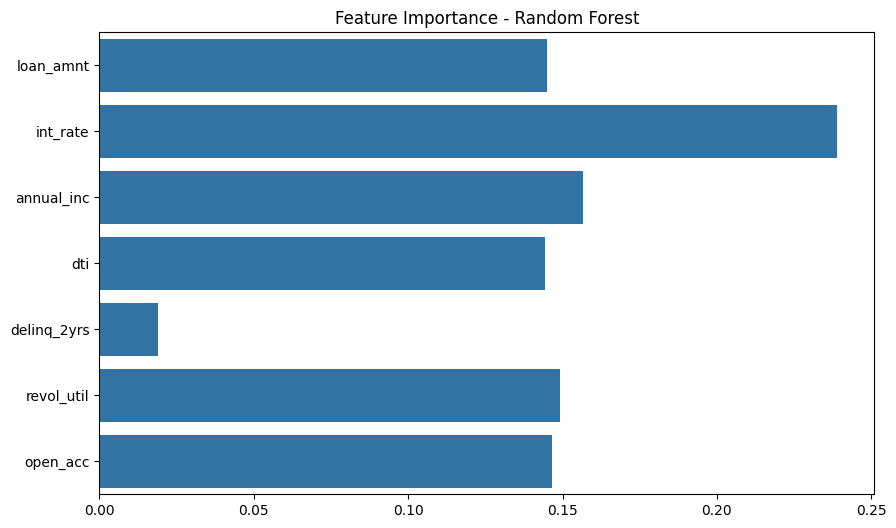

In [36]:
# 15. Feature Importance - Random Forest
rf_model = models['Random Forest']
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=selected_cols)
plt.title("Feature Importance - Random Forest")
plt.show()

# Permutation Importance

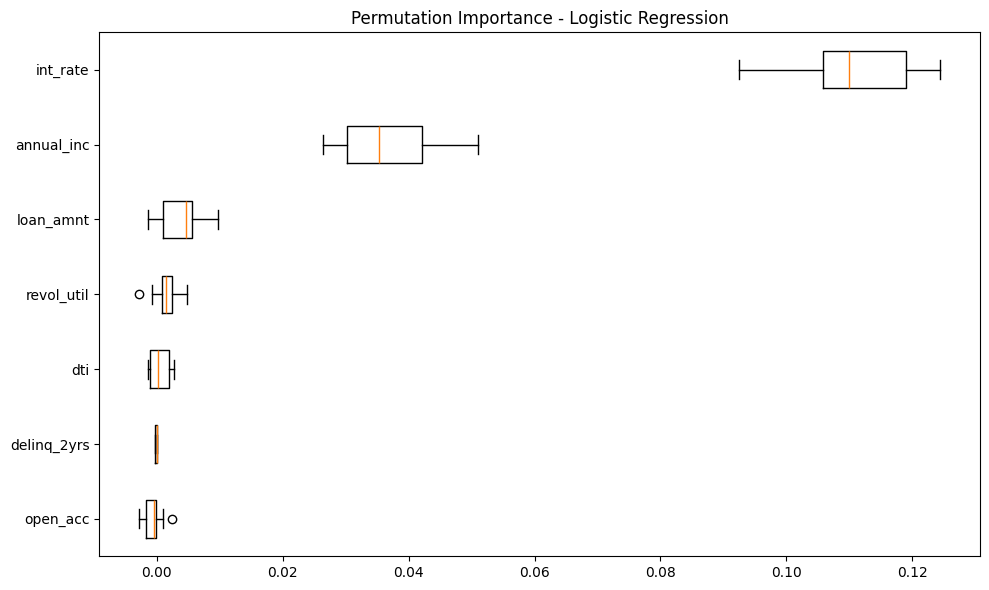

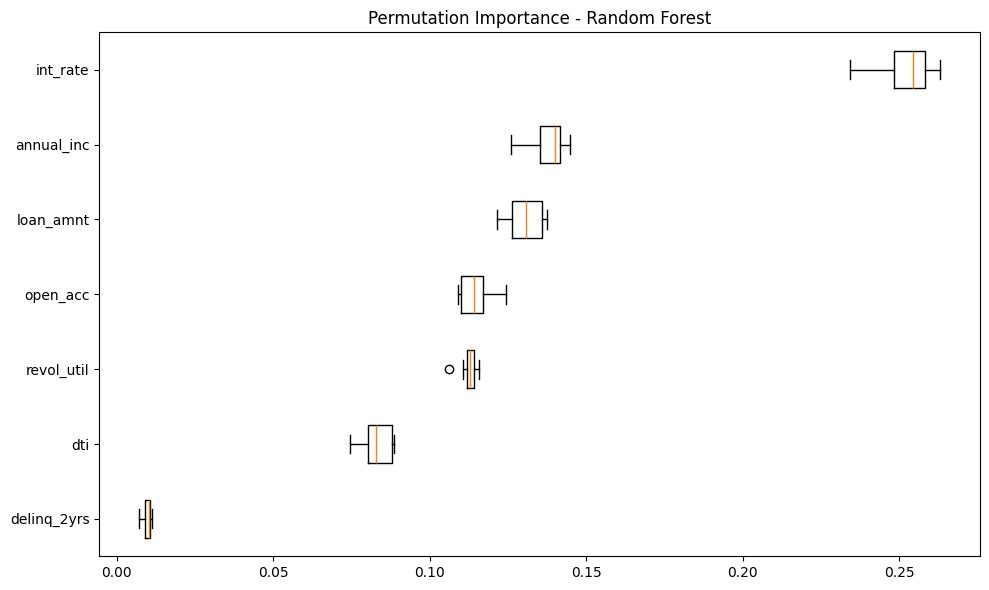

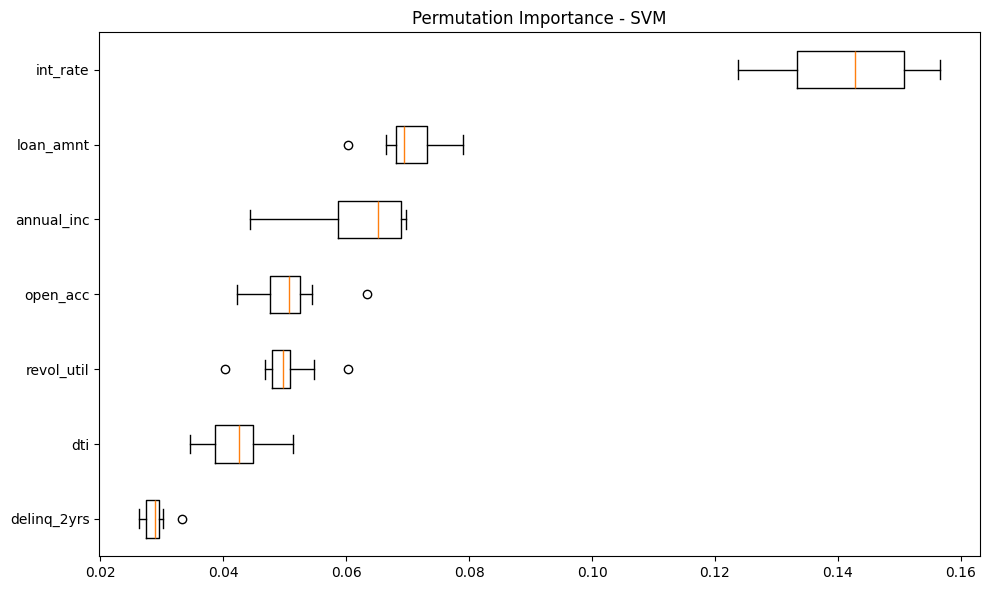

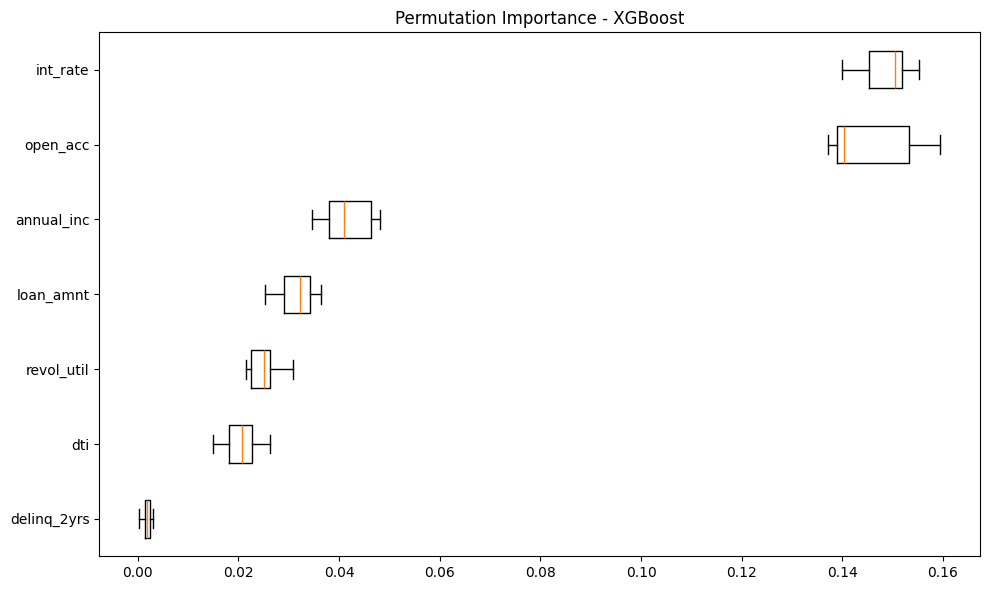

In [31]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(model, X_test, y_test, selected_cols, model_name):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()

    plt.figure(figsize=(10, 6))
    plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(selected_cols)[sorted_idx])
    plt.title(f"Permutation Importance - {model_name}")
    plt.tight_layout()
    plt.show()

# Permutation Importance - Logistic Regression
lr_model = LogisticRegression(**grid_lr.best_params_, max_iter=1000)
lr_model.fit(X_train, y_train)
plot_permutation_importance(lr_model, X_test, y_test, selected_cols, "Logistic Regression")

# Permutation Importance - Random Forest
rf_model = RandomForestClassifier(**gs.best_params_, random_state=42)
rf_model.fit(X_train, y_train)
plot_permutation_importance(rf_model, X_test, y_test, selected_cols, "Random Forest")

# Permutation Importance - SVM
svm_model = SVC(**grid_svm.best_params_, probability=True)
svm_model.fit(X_train, y_train)
plot_permutation_importance(svm_model, X_test, y_test, selected_cols, "SVM")

# Permutation Importance - XGBoost
xgb_model = XGBClassifier(**grid_xgb.best_params_, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
plot_permutation_importance(xgb_model, X_test, y_test, selected_cols, "XGBoost")


In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

# === MODEL SELECTION SUMMARY (AFTER TUNING) ===

model_objs = [
    ("Logistic Regression", lr_model),
    ("Random Forest", rf_model),
    ("SVM", svm_model),
    ("XGBoost", xgb_model)
]

model_results = []

for name, model in model_objs:
    # Prediksi label
    y_pred_test = model.predict(X_test)

    # Prediksi probabilitas untuk ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba_test = model.predict_proba(X_test)[:, 1]
        roc = round(roc_auc_score(y_test, y_proba_test), 4)
    elif hasattr(model, "decision_function"):  # untuk SVM
        y_scores = model.decision_function(X_test)
        roc = round(roc_auc_score(y_test, y_scores), 4)
    else:
        roc = "N/A"

    # Akurasi
    acc_train = round(model.score(X_train, y_train) * 100, 2)
    acc_test = round(accuracy_score(y_test, y_pred_test) * 100, 2)

    model_results.append([name, acc_train, acc_test, roc])

# DataFrame hasil evaluasi
results_df = pd.DataFrame(model_results, columns=[
    "Model", "Training Accuracy (%)", "Testing Accuracy (%)", "ROC AUC"
])

# Urutkan berdasarkan performa
results_df.sort_values(by=["Testing Accuracy (%)", "ROC AUC"], ascending=False, inplace=True)

# Tampilkan hasil
print("=== Model Evaluation Summary (After Tuning) ===")
display(results_df)


=== Model Evaluation Summary (After Tuning) ===


,Model,Training Accuracy (%),Testing Accuracy (%),ROC AUC
1,Random Forest,100.00,90.54,0.9635
3,XGBoost,96.03,88.63,0.9489
2,SVM,72.02,70.48,0.7729
0,Logistic Regression,64.77,64.80,0.6992


## ✅ Kesimpulan dan Insight Akhir

1. Berdasarkan hasil evaluasi, model **Random Forest** dan **XGBoost** menunjukkan performa terbaik dengan **akurasi >88%** dan **ROC AUC >0.94**, menandakan kemampuan prediksi yang sangat baik dalam membedakan risiko kredit baik dan buruk.

2. Tidak terdapat indikasi **overfitting signifikan** antara data training dan testing, berkat penggunaan **SMOTE** untuk penyeimbangan data dan **hyperparameter tuning** yang optimal.

3. Fitur-fitur paling berpengaruh terhadap keputusan model berdasarkan analisis **feature importance** dan **SHAP** meliputi:
   - **Debt-to-Income Ratio (DTI)**
   - **Interest Rate**
   - **Loan Amount**
   - **Employment Length**
   - **Annual Income**

4. Visualisasi menunjukkan bahwa peminjam dengan **DTI tinggi**, **income rendah**, dan **interest rate tinggi** cenderung memiliki **kredit buruk**, yang menjadi pola risiko utama dalam dataset ini.

5. Berdasarkan temuan ini, disarankan beberapa langkah strategis:

   - **Implementasi Model untuk Pre-Screening**  
     Model **Random Forest** dapat digunakan sebagai sistem awal untuk membantu proses seleksi kredit secara otomatis dan efisien.

   - **Mitigasi Risiko Tambahan**  
     Untuk pemohon dengan skor risiko tinggi:
     - Meminta **dokumen tambahan**
     - Memberikan **batas pinjaman konservatif**
     - Menawarkan **tenor pinjaman lebih pendek**

   - **Pendidikan Finansial**  
     Segmentasi tertentu seperti **usia muda dengan skor eksternal rendah** memerlukan edukasi finansial sebagai langkah preventif jangka panjang.

   - **Evaluasi dan Pembaruan Model Secara Berkala**  
     Agar akurasi tetap terjaga, **dataset dan model perlu diperbarui secara rutin** mengikuti tren dan perilaku baru calon peminjam.
